## **PROJEK AKHIR**
### **Pengantar Pembelajaran Mesin - Dr. Bambang Heru Iswanto** <br>

### **Kelompok 4 - Fisika B 2021**
### 1. Khansa Farras Callista (1306621067)<br>
### 2. Salma Mardhiyah (1306621061) <br>

---

## **Clustering Dataset Mobil Elektrik**
**Tujuan** : <br>
Clustering dilakukan untuk mengelompokkan mobil listrik berdasarkan performa (top speed dan acceleration time) mobil listrik dan harganya untuk membantu dalam memahami preferensi dan kebutuhan pelanggan dalam memilih kendaraan listrik. Hal ini memungkinkan perusahaan atau penjual untuk menyesuaikan produk dan strategi agar lebih sesuai dengan kebutuhan pasar.
<br> <br>

**Tentang** : <br>
Dataset diperoleh dari repositori informasi kendaraan listrik yang disediakan oleh EV Database. Platform ini terkenal karena akurasi dan kekomprehensifannya dalam mengumpulkan data tentang berbagai kendaraan listrik, menjadikannya sumber yang dapat diandalkan bagi para penggemar, peneliti, dan profesional industri.

*Link:*
[Kaggel - Dataset yang digunakan](https://www.kaggle.com/datasets/fatihilhan/electric-vehicle-specifications-and-prices/data)

### **Data Exploration**

In [ ]:
# Mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dt = pd.read_csv('EV_cars.csv')

print("Shape of dataset:", dt.shape, "\n")

dt.head()

Shape of dataset: (360, 9) 



,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


**Deskriptif Data**
1. **Battery**: Kapasitas baterai mobil listrik dalam kilowatt-jam (kWh).
2. **Car_name**: Nama model mobil listrik.
3. **Car_name_link**: Link langsung menuju halaman terkait di EV Database.
4. **Efficiency**: Tingkat efisiensi energi mobil listrik dalam watt-hour per kilometer (Wh/km).
5. **Fast_charge**: Kemampuan pengisian cepat mobil listrik dalam hitungan menit untuk persentase pengisian tertentu.
6. **Price.DE.**: Harga mobil listrik di Jerman.
7. **Range**: Jarak tempuh mobil listrik dengan sekali pengisian daya dalam kilometer.
8. **Top_speed**: Kecepatan maksimum yang dapat dicapai mobil listrik dalam kilometer per jam.
9. **Acceleration..0.100.**: Waktu akselerasi dari 0 hingga 100 kilometer per jam.

In [ ]:
# Mengganti nama fitur
dt.rename(columns={"Price.DE." : "Price","acceleration..0.100." : "Acceleration_time"}, inplace=True)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Battery            360 non-null    float64
 1   Car_name           360 non-null    object 
 2   Car_name_link      360 non-null    object 
 3   Efficiency         360 non-null    int64  
 4   Fast_charge        358 non-null    float64
 5   Price              309 non-null    float64
 6   Range              360 non-null    int64  
 7   Top_speed          360 non-null    int64  
 8   Acceleration_time  360 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 25.4+ KB


In [ ]:
dt.describe()

,Battery,Efficiency,Fast_charge,Price,Range,Top_speed,Acceleration_time
count,360.000000,360.000000,358.000000,309.000000,360.000000,360.000000,360.000000
mean,71.187500,195.175000,552.960894,67264.284790,369.694444,180.919444,7.288889
std,20.389849,31.909429,236.864801,34508.249544,107.315514,36.232023,3.005897
min,21.300000,137.000000,170.000000,22550.000000,135.000000,125.000000,2.100000
25%,57.500000,171.000000,360.000000,45690.000000,295.000000,155.750000,4.900000
50%,71.000000,188.000000,520.000000,56942.000000,380.000000,180.000000,6.750000
75%,85.000000,208.250000,680.000000,73100.000000,446.250000,200.000000,9.000000
max,123.000000,295.000000,1290.000000,218000.000000,685.000000,320.000000,19.100000


Data yang digunakan adalah data mengenai spesifikasi dari kendaraan listrik di Jerman

1. Rata-rata kapasitas baterai kendaraan listrik adalah 71 kWh, dengan variasi kapasitas dari yang terendah 21 kWh hingga yang tertinggi 123 kWh.
2. Rata-rata efisiensi energi kendaraan listrik adalah 195 Wh/km, ini menunjukkan jumlah watt-hour yang digunakan oleh kendaraan listrik per kilometer.
3. Jarak rata-rata yang dapat ditempuh kendaraan listrik dengan fast charging selama satu jam adalah 553 km, dengan variasi kendaraan yang terendah hanya dapat mencapai 170 km dan yang tertinggi dapat mencapai jarak 1290 km.
4. Harga rata-rata kendaraan listrik di Jerman adalah €67264, dengan variasi harga mulai dari €22550 hingga €218000.
5. Jarak tempuh rata-rata kendaraan listrik pada satu pengisian penuh baterai adalah 370 km, dengan Jarak terpendek yang dapat ditempuh adalah 135 km dan jarak terjauh yang dapat ditempuh 685 km
6. Top Speed dari kendaraan listrik di Jerman bervariasi mulai dari 125 km/h dan yang tertinggi adalah 320 km/h
7. Waktu rata-rata yang dibutuhkan oleh kendaraan listrik untuk mencapai kecepatan 100 kilometer per jam dari keadaan diam adalah 7 detik

### **Cleaning Data**

In [ ]:
# Mengecek ada tidaknya data duplikasi
dt.duplicated().sum()

0

**Mengecek nilai null data**

In [ ]:
missing_values = dt.isnull().sum()
missing_values

Battery               0
Car_name              0
Car_name_link         0
Efficiency            0
Fast_charge           2
Price                51
Range                 0
Top_speed             0
Acceleration_time     0
dtype: int64

In [ ]:
dt.dropna(inplace=True)
missing_values = dt.isnull().sum()
missing_values

Battery              0
Car_name             0
Car_name_link        0
Efficiency           0
Fast_charge          0
Price                0
Range                0
Top_speed            0
Acceleration_time    0
dtype: int64

Dikarenakan harga serta kemampuan fast charger mobil listrik bergantung dengan mesin yang digunakan maka tidak dapat dilakukan pengisian nilai null dengan nilai rata-rata atau nilai lain karena akan merubah karakteristik sebenarnya dari mobil listrik sehingga data null dapat dihilangkan.

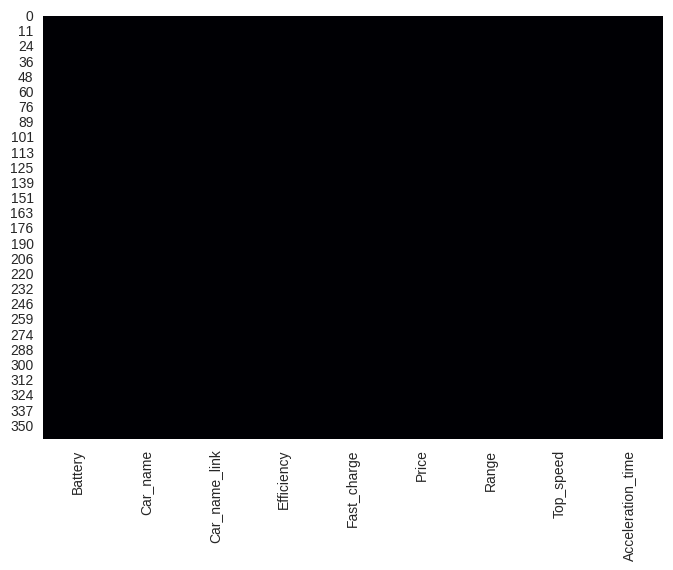

In [ ]:
sns.heatmap(dt.isnull(),cmap = 'magma',cbar = False);

In [ ]:
# Menghilangkan baris yang tidak diperlukan
dt = dt.drop('Car_name_link', axis=1)
dt.head()

,Battery,Car_name,Efficiency,Fast_charge,Price,Range,Top_speed,Acceleration_time
0,75.0,Tesla Model Y Long Range Dual Motor,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,149,780.0,55220.0,505,201,4.4


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 359
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Battery            307 non-null    float64
 1   Car_name           307 non-null    object 
 2   Efficiency         307 non-null    int64  
 3   Fast_charge        307 non-null    float64
 4   Price              307 non-null    float64
 5   Range              307 non-null    int64  
 6   Top_speed          307 non-null    int64  
 7   Acceleration_time  307 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 21.6+ KB


Berdasarkan informasi diatas, data mobil listrik yang akan digunakan sebanyak 307 data.

**Checking Outlier**

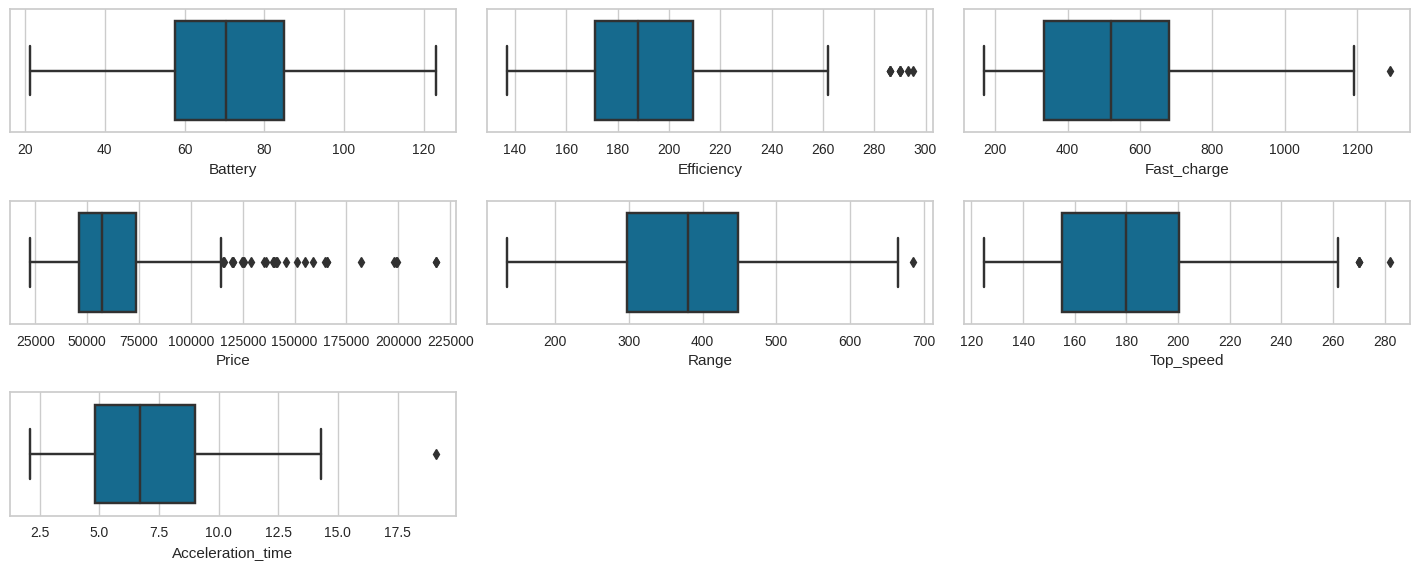

In [ ]:
class MultiplePlot:
    def __init__(self, df, columns, ncols=None, figsize=(16, 4)):
        self.df = df
        self.ncols = ncols if ncols is not None else 1
        self.nrows = math.ceil(len(columns) / self.ncols)
        self.figsize = figsize
        self.columns = columns
        self.__createFrame()

    def __createFrame(self):
        self.fig, self.ax = plt.subplots(
            ncols=self.ncols,
            nrows=self.nrows,
            figsize=self.figsize
        )

    def getPlotFunction(self, plot_type):
        plotFunc = sns.lineplot
        if plot_type == "boxplot":
            plotFunc = sns.boxplot
        elif plot_type == "displot":
            plotFunc = sns.displot
        return plotFunc

    def plot(self, plot_type):
        plotFunc = self.getPlotFunction(plot_type)
        idCol = 0
        for idx, row in enumerate(self.ax):
            for idy, el in enumerate(row):
                if idCol < len(self.columns):
                    plotFunc(ax=self.ax[idx][idy], x=self.df[self.columns[idCol]])
                    self.ax[idx][idy].set_xlabel(self.columns[idCol])
                else:
                    self.fig.delaxes(self.ax[idx][idy])
                idCol += 1

    def show(self):
        self.fig.tight_layout(pad=1.5)
        plt.show()

# Sample list of columns (with corrected commas)
columns = [
    "Battery",
    "Efficiency",
    "Fast_charge",
    "Price",
    "Range",
    "Top_speed",
    "Acceleration_time"]

boxplot = MultiplePlot(
    df=dt,
    columns=columns,
    ncols=3,
    figsize=(14.5, 6))

boxplot.plot("boxplot")
boxplot.show()

Outlier yang ditunjukkan pada data diatas merupakan bagian dari keberagaman dalam data mobil listrik yang valid dimana setiap mobil akan berbeda-beda bergantung mesin yang digunakan sehingga tidak perlu dilakukan penghilangan outlier, salah satunya pada fitur *price* yang memiliki banyak outlier dan hal tersebut sangat mungkin terjadi dikarenakan merk ataupun model mobil mempengaruhi harga dan spesifikasinya tidak disebutkan pada fitur dataset

### **Korelasi Matriks**

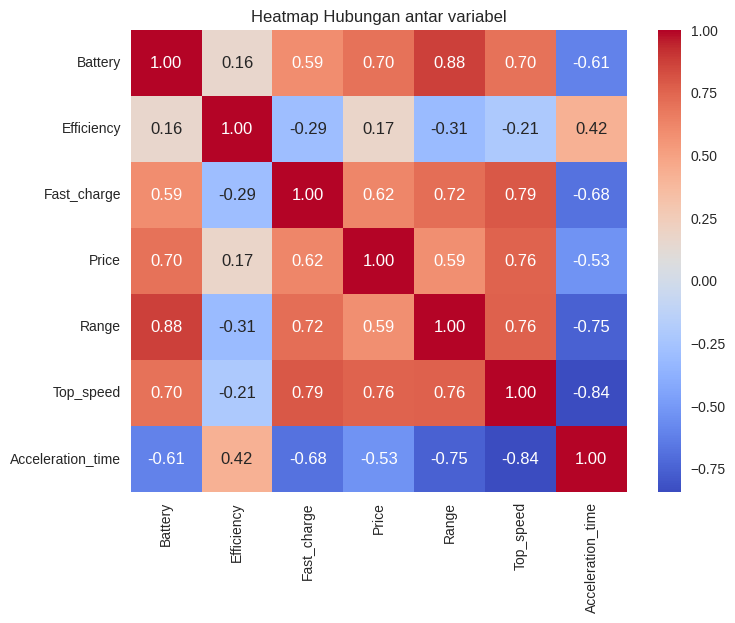

In [ ]:
correlation_matrix = dt.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Hubungan antar variabel')
plt.show()

Hasil korelasi diatas menunjukkan korelasi yang tinggi antara top speed, acceleration time, dan price yang akan kemudian dilakukan clustering

In [ ]:
dt2 = dt[["Top_speed", "Acceleration_time", "Price"]]
dt2.head()

,Top_speed,Acceleration_time,Price
0,217,5.0,59017.0
1,201,6.1,46220.0
2,160,7.3,44625.0
3,160,7.9,39990.0
4,201,4.4,55220.0


### **Metode Clustering K-Mean**

**Scalling Data**

In [ ]:
dt_before = dt[["Price","Top_speed","Acceleration_time"]]
scaler = StandardScaler().fit_transform(dt_before)
dt2_ = pd.DataFrame(scaler)
dt2_.head()

,0,1,2
0,-0.247423,0.976670,-0.738289
1,-0.619362,0.537347,-0.381455
2,-0.665720,-0.588417,0.007819
3,-0.800434,-0.588417,0.202456
4,-0.357781,0.537347,-0.932926


**Elbow Method**

Elbow Method to determine the number of clusters to be formed:


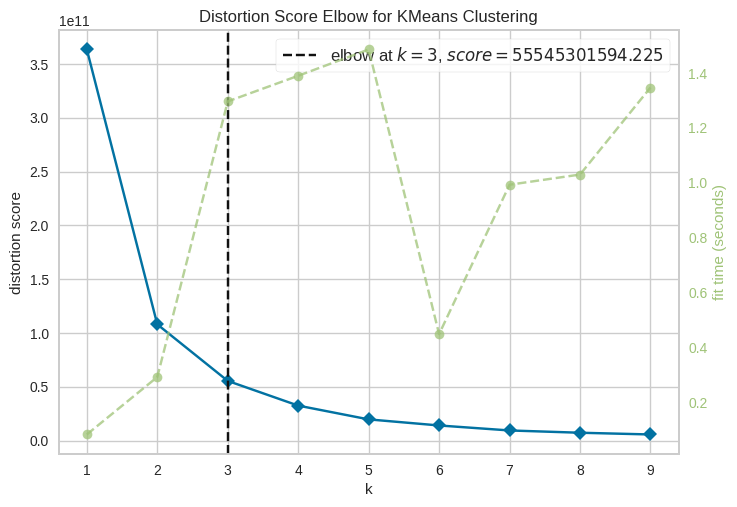

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=(1,10))
Elbow_M.fit(dt2)
Elbow_M.show()

**Implimentation of k-means & Silhouette coefficient metric**

In [ ]:
KMs = KMeans(n_clusters = 3, init='k-means++',random_state=42)
KMs.fit(dt2)

# Now, print the silhouette score of this model
dt2['cluster'] = KMs.labels_
print("silhouette_score is :",silhouette_score(dt2, KMs.labels_, metric='euclidean'))

silhouette_score is : 0.6724330903955514


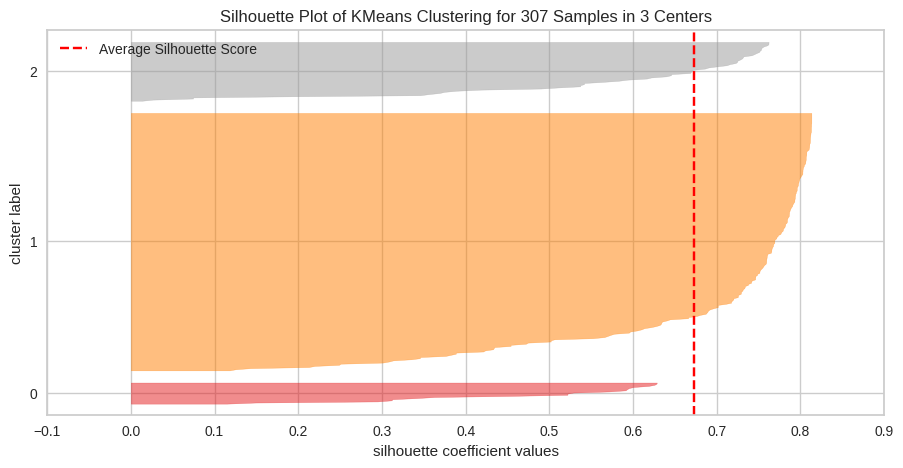

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 307 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhouette Plot of Kmean
KMs2 = KMeans(n_clusters = 3, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(KMs2,size=(1080, 500))

visualizer.fit(dt2)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

Garis vertikal pada plot diatas menunjukkan titik rata-rata skor silhouette pada setiap poin dimana dihasilkan lebar semakin mendekati angka 1 yang menandakan bahwa data antar cluster telah terpisah dengan cukup baik. Setiap blok merepresentasikan tingkat keseimbangan distribusi setiap cluster dimana pada kasus ini kluster 1(berwarna oren) memiliki jumlah data yang jauh lebih banyak dari cluster lainnya.

### **Visualisasi Clustering**

In [ ]:
import plotly.express as px

# Data for the scatter plot
scatter_data = dt2[['Top_speed', 'Acceleration_time', 'Price']]

# Data for the cluster centers
centers_data = pd.DataFrame(KMs.cluster_centers_, columns=['Top_speed', 'Acceleration_time', 'Price'])
centers_data['cluster'] = ['Center'] * len(centers_data)

print (centers_data)


    Top_speed  Acceleration_time          Price cluster
0  250.500000           3.420000  164671.500000  Center
1  167.103004           8.176824   51508.751073  Center
2  217.666667           4.816667  100679.722222  Center


In [ ]:
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

# Data for the scatter plot
scatter_data = dt2

# Data for the cluster centers
centers_data = pd.DataFrame(KMs.cluster_centers_, columns=['Top_speed', 'Acceleration_time', 'Price'])
centers_data['cluster'] = ['Center'] * len(centers_data)

# Combine the scatter and center data
combined_data = pd.concat([scatter_data, centers_data])

fig = px.scatter_3d(combined_data, x='Top_speed', y='Acceleration_time', z='Price',
                    color='cluster', symbol='cluster', size_max=5,
                    color_continuous_scale='Viridis', opacity=0.8,
                    labels={'Top_speed': 'Top Speed', 'Acceleration_time': 'Acceleration Time', 'Price': 'Price'},
                    title='3D Cluster Visualization with Centers')

fig.update_traces(marker=dict(size=5), selector=dict(type='scatter3d'))

# Atur marker untuk pusat cluster menjadi lingkaran hitam penuh
fig.update_traces(marker=dict(symbol='cross', size=10, color='black'), selector=dict(name='Center'))

fig.update_layout(scene=dict(
                    xaxis_title='Top Speed',
                    yaxis_title='Acceleration Time',
                    zaxis_title='Price'),
                    margin=dict(l=50, r=50, b=50, t=50),  # Atur margin agar plot tidak terpotong
                    width=800, height=600,
                    title='Visualizing 3D Clustering')  # Atur ukuran keseluruhan plot

image_filename = '3d_plot.png'
pio.write_image(fig, image_filename, format='png', scale=4)

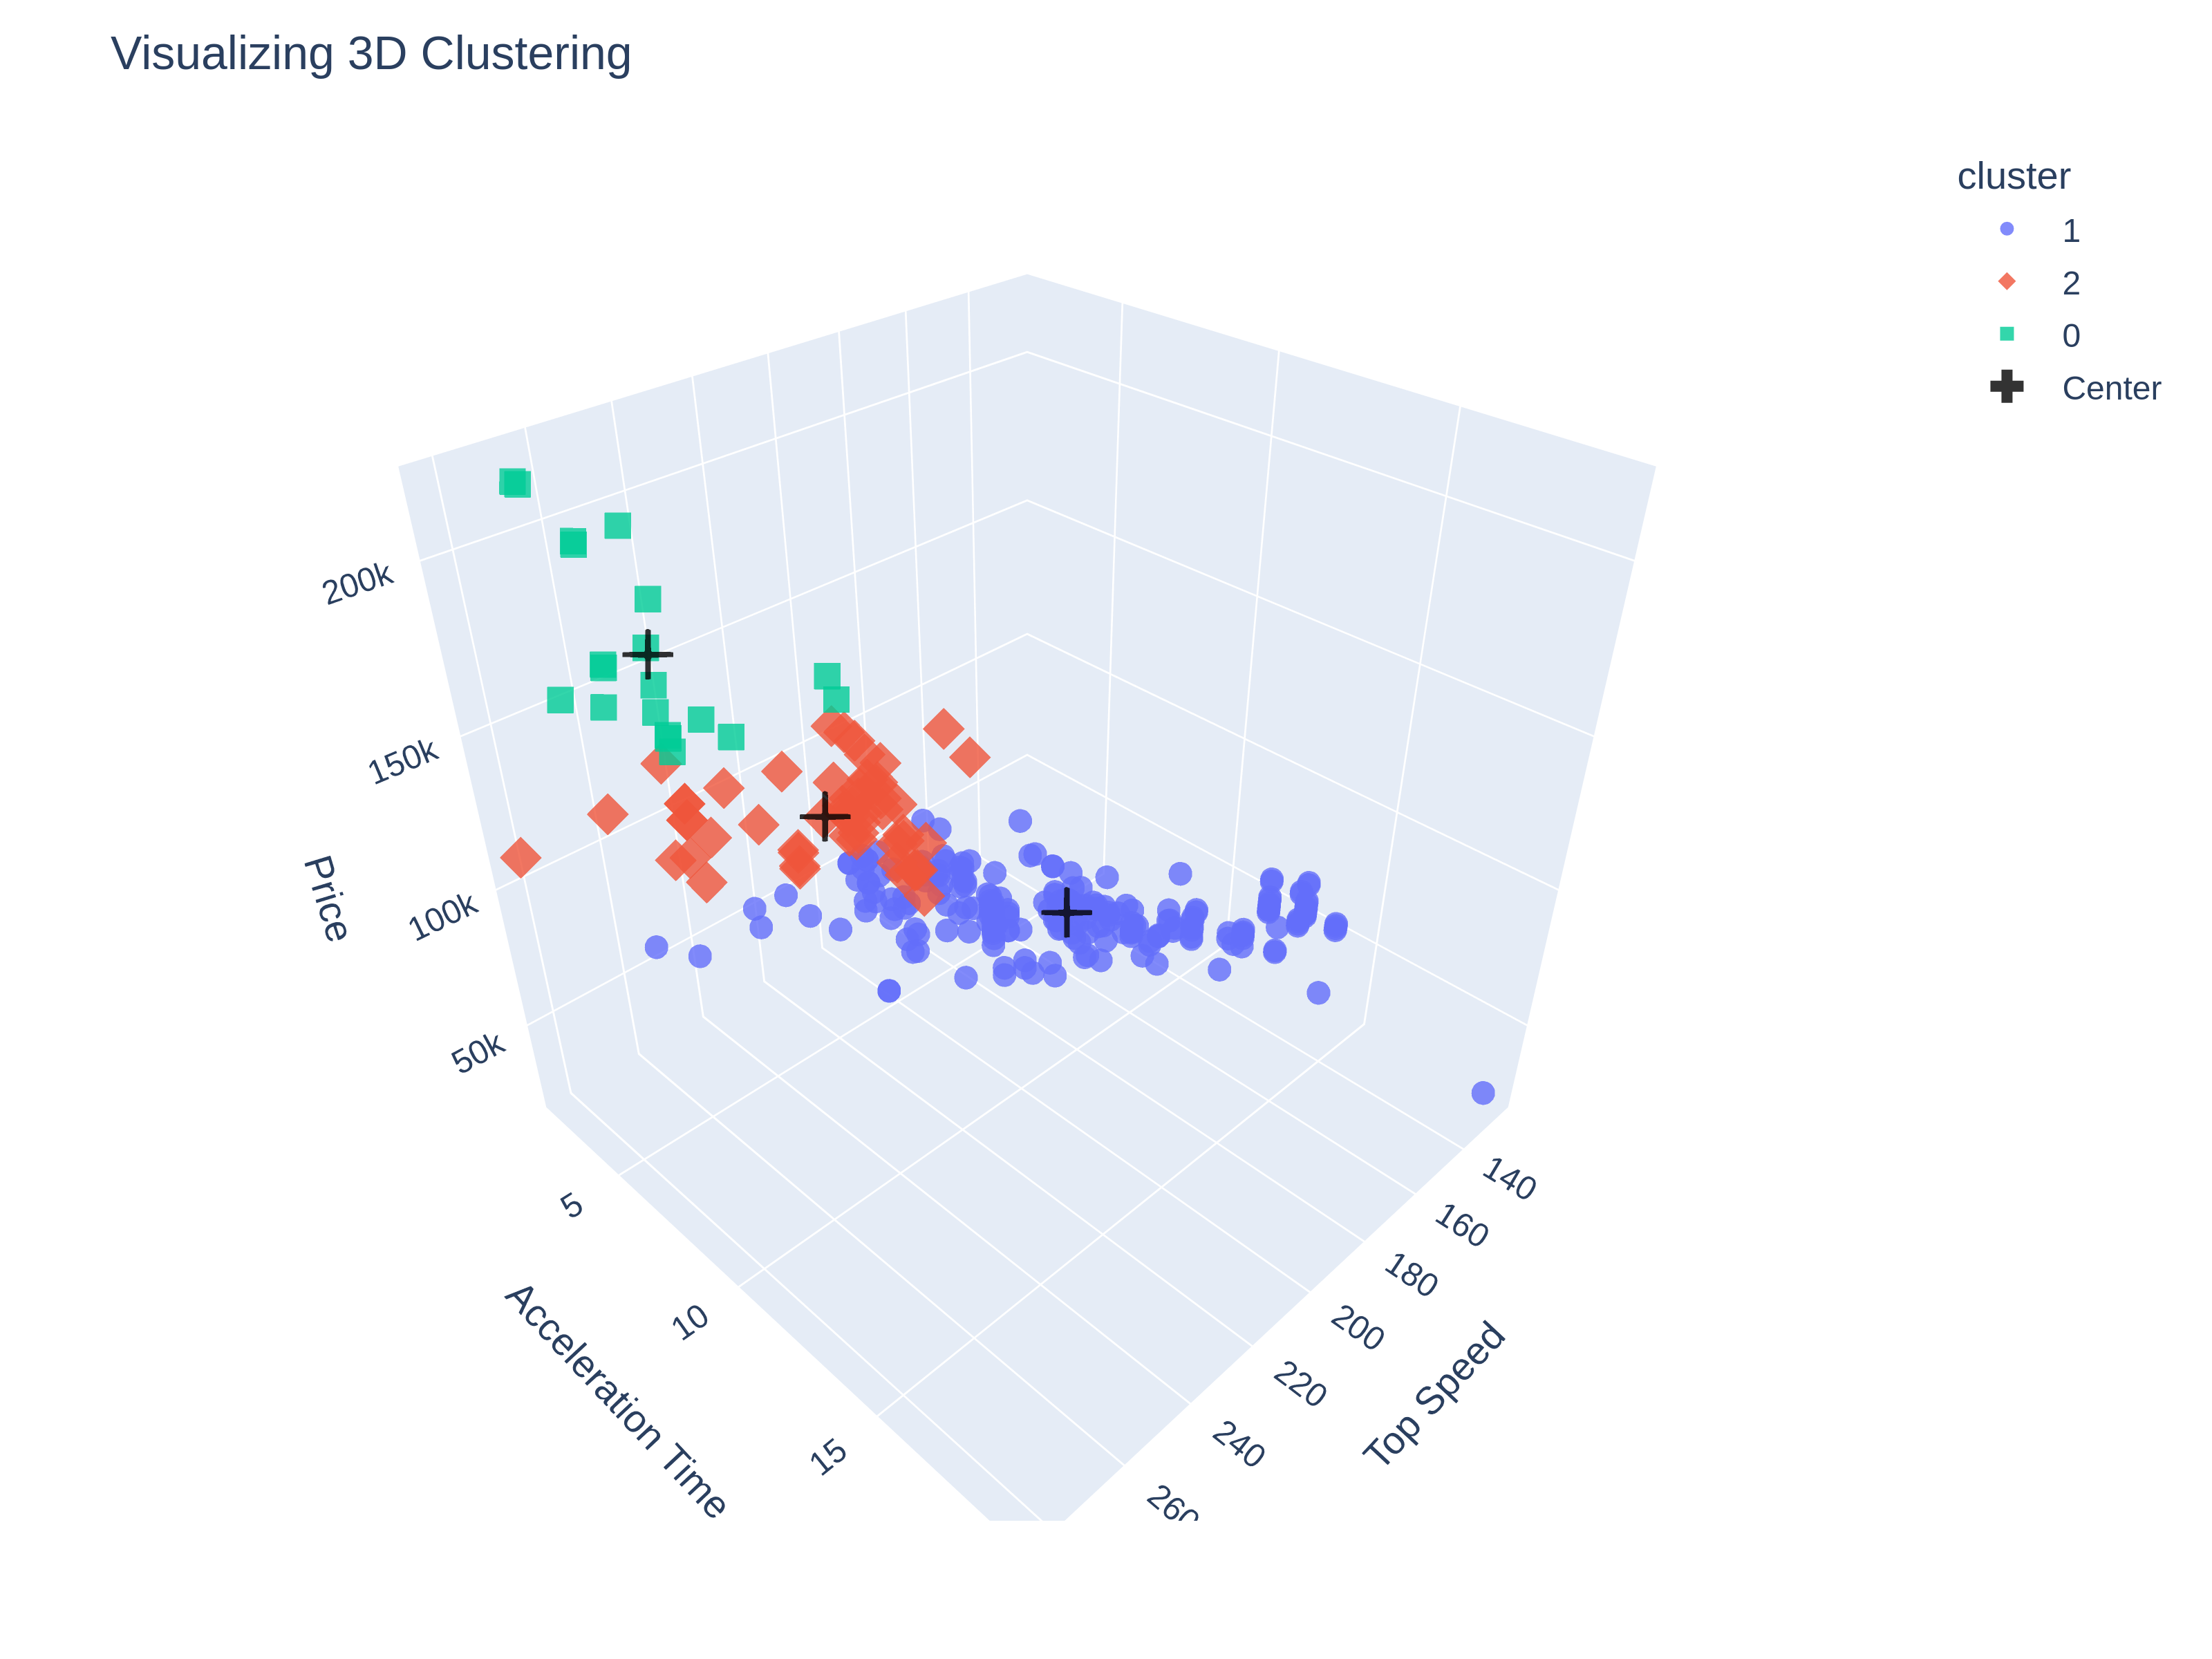

In [ ]:
# Tampilkan hasil plot yang sudah disimpan
Image(filename=image_filename, width=800, height=600)

Hasil clustering diatas menunjukkan data yang telah terpisah dengan baik antar clustering dimana clustering biru memiliki data yang lebih banyak dibandingkan cluster merah dan hijau. Melalui visualisasi ini dapat disimpulkan bahwa clustering yang dilakukan telah bekerja dengan baik.

In [ ]:
# Mengurutkan data sesuai cluster dan harganya
dt2 = dt2
dt2['Car_name'] = dt['Car_name']
dt2.sort_values(by=['cluster', 'Price'])

,Top_speed,Acceleration_time,Price,cluster,Car_name
125,210,4.6,135434.0,0,Mercedes EQS SUV 580 4MATIC
116,250,3.8,136100.0,0,BMW iX M60
296,240,3.5,139438.0,0,Mercedes EQE SUV AMG 53 4MATIC+
31,240,4.7,139900.0,0,BMW i7 xDrive60
207,250,3.7,139906.0,0,Porsche Taycan GTS
...,...,...,...,...,...
341,250,4.0,120081.0,2,Porsche Taycan 4S Plus Sport Turismo
262,210,5.2,124545.0,2,Mercedes EQS SUV 500 4MATIC
286,210,4.3,124920.0,2,Mercedes EQE SUV AMG 43 4MATIC
268,210,4.8,125378.0,2,Mercedes EQS 500 4MATIC


Tabel diatas menunjukkan pengurutan berdasarkan clustering dan harga mobil listrik sehingga dapat menjadi pertimbangan penawaran bagi produsen atau penjual kepada costumer

### **Evaluation Metrics**

In [ ]:
# Menghitung total data clustering
num_observations = len(dt2)

# Memisahkan cluster dengan data
X = dt2.drop(['cluster','Car_name'], axis=1)
clusters = dt2['cluster']

# Evaluasi metric
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        307         |
|    Silhouette Score     | 0.6724330902014218 |
| Calinski Harabasz Score | 842.5069557513286  |
|  Davies Bouldin Score   | 0.5046388576217054 |
+-------------------------+--------------------+


Terdapat 360 data pada hasil clustering dengan beberapa jenis metrik untuk mengevaluasi algoritma clustering.
1. Silhouette Score: Metrik yang digunakan untuk mengevaluasi jarak pemisah antar clustering sehingga dapat terlihat seberapa besar clustering saling terpisah. Besar skor dimulai dari -1 sampai 1. Pada model yang digunakan kali ini, besar skor yang terukur sebesar 0.672 diatas 0.5 yang menandakan bahwa clustering telah dibuat dengan baik. Walaupun jarak antar klustering tidak berjauhan (dilihat dari plot 3D diatas), clustering sudah saling terpisah dan dapat dibedakan satu sama lain. Semakin tinggi silhoutte score yang didapat maka semakin baik clusteringnya.

2. Calinski Harabasz Score: Metrik evaluasi yang mengukur seberapa baik cluster telah terpisah dan dipadatkan. Nilai yang tinggi menunjukkan bahwa clustering terpisah satu sama lain dan padat atau terkumpul perkluster. Nilai skor sebesar 842.51 menunjukkan bahwa klaster yang dihasilkan cukup terpisah dengan baik dan homogen di dalam klaster masing-masing.

3. Davies Bouldin Score: Metrik yang mengukur seberapa mirip kesamaan antar kluster yang ditentukan. Davies Bouldin score berkisar 0 sampai tak hingga dimana semakin rendah nilainya semakin baik karena ini menunjukkan bahwa klaster-klasternya lebih terpisah dan lebih kompak. Nilai 0.5046 menunjukkan nilai yang rendah jika dibandingkan dengan skor maksimal tak hingga sehingga dapat diketahui bahwa clustering yang dihasilkan memiliki tingkat kompleksitas yang rendah.

Berdasarkan hasil diatas, dapat disimpulkan bahwa clustering yang telah dilakukan pada dataset memiliki performa yang baik sehingga dapat dilanjutkan untuk dianalisis.

### **Cluster Analysis**

In [ ]:
avg_df = dt2.groupby(['cluster'], as_index=False).mean()
print("Rata-Rata clustering")
print(avg_df.to_string(index=False))

Rata-Rata clustering
 cluster  Top_speed  Acceleration_time         Price
       0 250.500000           3.420000 164671.500000
       1 167.103004           8.176824  51508.751073
       2 217.666667           4.816667 100679.722222


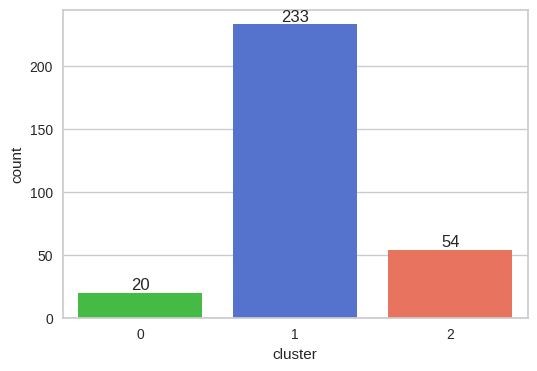

In [ ]:
# Menentukan palet warna yang sesuai
cluster_palette = {0: 'limegreen', 1: 'royalblue', 2: 'tomato'}

# countplot dengan palet warna yang ditentukan
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=dt2, x='cluster', linewidth=2, palette=cluster_palette)
for cont in ax.containers:
    ax.bar_label(cont)

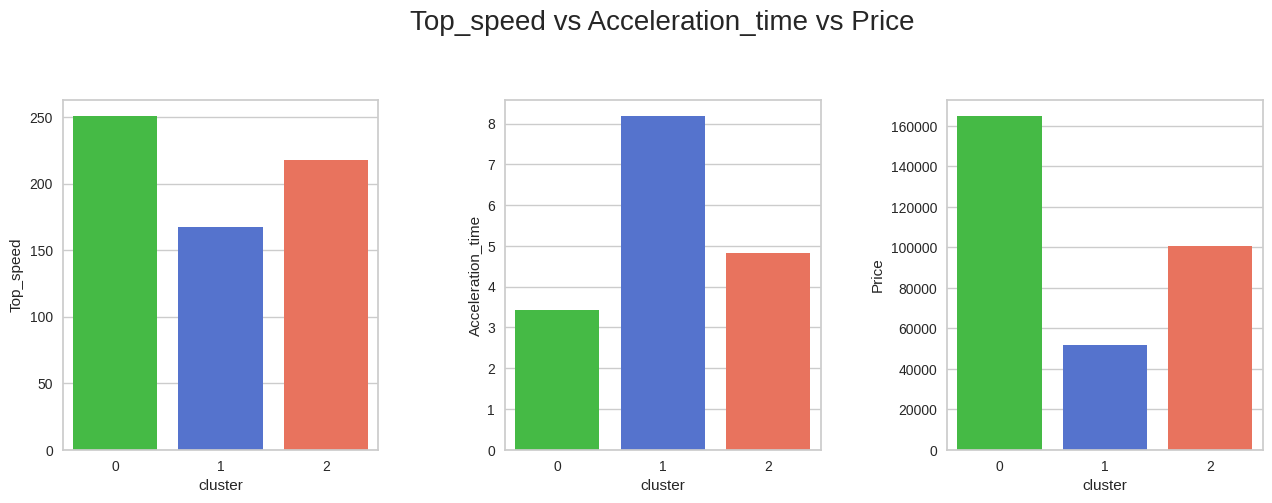

In [ ]:
# Plot bar chart for each feature dengan palet warna yang ditentukan
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.barplot(x='cluster', y='Top_speed', data=avg_df, ax=ax[0], palette=cluster_palette)
sns.barplot(x='cluster', y='Acceleration_time', data=avg_df, ax=ax[1], palette=cluster_palette)
sns.barplot(x='cluster', y='Price', data=avg_df, ax=ax[2], palette=cluster_palette)
plt.suptitle('Top_speed vs Acceleration_time vs Price', fontsize=20)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8, wspace=0.4, hspace=0.4)
plt.show()

**Analisis Clustering**

Clustering yang dilakukan menghasilkan 3 pengelompokan dimana
1. Cluster 0 berwarna hijau <br>
  - Cluster 0 merupakan cluster mobil listrik untuk mobil dengan kecepatan maksimum tertinggi diantara clustering lainnya. Acceleration time yang dimiliki cluster 0 menunjukkan waktu percepatan terendah sehingga mobil listrik cluster 0 memerlukan waktu paling cepat untuk mencapai kecepatan maksimum. Kelompok ini memiliki harga yang paling tinggi atau mahal dibandingkan cluster lainnya. Hal ini dibuktikan dengan rata-rata Top Speed yang sangat tinggi (rata-rata 250.50 km/h), Acceleration Time yang cepat (rata-rata 3.42 detik), dan memiliki harga yang tinggi (rata-rata $164671.50).
  - Dapat disimpulkan bahwa cluster 0 merupakan cluster untuk performa tertinggi. Jumlah mobil listrik pada cluster ini memiliki jumlah paling sedikit sebanyak 20 mobil saja.
  - Cluster ini menargetkan pasar yang mengutamakan kinerja dan kecepatan mobil listrik.

2. Cluster 1 berwarna biru <br>
  - Cluster 1 terdiri dari mobil dengan kecepatan maksimum terendah dibanding cluster lainnya dengan waktu percepatan tertinggi yang menunjukkan bahwa dibutuhkan waktu yang lebih lama dalam mencapai kecepatan maksimum yang dibuktikan dengan Top Speed yang rata-ratanya sekitar 167.10 km/h dan Acceleration Time rata-rata 8.18 detik.
  - Dapat disimpulkan bahwa cluster 1 merupakan mobil listrik dengan performa terendah. Meskipun demikian, mobil cluster ini memiliki harga yang lebih terjangkau dengan rata-rata hanya mencapai  $51508.75 sehingga ditujukan kepada kostumer yang mencari harga terbaik atau termurah.
  - Cluster 1 memiliki jumlah mobil sebanyak 233 yang menunjukkan bahwa sebagian besar dataset merupakan cluster 1.

3. Cluster 2 berwarna merah <br>
  - Cluster 2 ini memiliki tingkat kecepatan maksimum dan waktu percepatan yang berada ditengah tengah diantara kedua cluster lainnya. Harga yang dimiliki pada mobil listrik cluster 2 ini berada di posisi tengah-tengah juga. Hal ini dibuktikan dengan rata-rata Top Speed dan Acceleration Time yang berada di tengah-tengah, yaitu 217.67 km/h dan 4.82 detik, serta memiliki harga rata-rata yang juga berada di tengah-tengah yaitu $100679.72.
  - Dapat disimpulkan bahwa cluster 2 merupakan mobil listrik dengan performa dan harga yang menengah.
  - Cluster 2 cocok untuk menarik konsumen yang mencari keseimbangan antara kualitas performa dengan harga yang dimiliki. Cluster ini terdiri dari 54 mobil listrik.

**Kesimpulan**

Dapat disimpulkan bahwa clustering membagi mobil listrik ke dalam tiga kelompok berbeda berdasarkan performa (top speed dan acceleration time) dan harganya. Dengan membagi mobil listrik berdasarkan performa dan harganya, maka hal ini akan membantu penjual untuk menargetkan konsumen dengan strategi yang sesuai untuk setiap clustering.  Selain itu, clustering ini memungkinkan penjual untuk dapat merencanakan, menargetkan, dan memahami kebutuhan atau preferensi pasar dengan lebih baik sehingga dapat melakukan penjualan dengan maksimal.


In [ ]:
%%shell
jupyter nbconvert --to html /content/Kelompok_4_UAS_Projek_Clustering.ipynb

[NbConvertApp] Converting notebook /content/Kelompok_4_UAS_Projek_Clustering.ipynb to html
[NbConvertApp] Writing 1771158 bytes to /content/Kelompok_4_UAS_Projek_Clustering.html
